## **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**

## ** Import libraries**

In [1]:
! pip install lazypredict

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **Load the data set**

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [7]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/dat/bioactivity_preprocessed_datapIC50_1.csv')

In [9]:
df.head()

,Unnamed: 0,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL257834,CC(C)(C)CN1CCC(NC(=O)c2csc(NC(=O)c3ccc4cc5n(c4...,active,548.71,4.21,3.00,7.00,7.03
1,1,CHEMBL465465,CS(=O)(=O)c1ccc(CNCc2cc(C(=O)O)c(Nc3ccc(I)cc3F...,inactive,590.36,4.84,3.00,5.00,4.52
2,2,CHEMBL517647,NC(=O)C[C@H](N)C(=O)NCc1cc(C(=O)O)c(Nc2ccc(I)c...,inactive,536.25,1.97,5.00,5.00,4.52
3,3,CHEMBL481968,O=C(N/N=C/c1cc(C(=O)O)c(Nc2ccc(I)cc2F)c(F)c1F)...,inactive,559.24,4.00,4.00,6.00,4.82
4,4,CHEMBL481969,O=C(CS(=O)(=O)c1ccc(Cl)cc1)N/N=C/c1cc(C(=O)O)c...,intermediate,651.79,4.73,3.00,6.00,5.52


In [10]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **DATA PRE PROCESSING**

In [11]:
X.shape

(538, 8)

## Remove low variance features

In [12]:
from sklearn.feature_selection import VarianceThreshold

categorical_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_columns)

selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(538, 7)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

# ** Compare ML algorithms**

In [ ]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

In [15]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,1.00,1.00,0.00,0.02
ExtraTreeRegressor,1.00,1.00,0.00,0.02
ExtraTreesRegressor,1.00,1.00,0.00,0.22
GaussianProcessRegressor,1.00,1.00,0.00,0.07
XGBRegressor,1.00,1.00,0.01,0.44
RandomForestRegressor,0.97,0.97,0.18,0.31
BaggingRegressor,0.96,0.96,0.21,0.06
GradientBoostingRegressor,0.95,0.95,0.24,0.21
HistGradientBoostingRegressor,0.93,0.93,0.29,0.60


[(0.0, 1.0)]

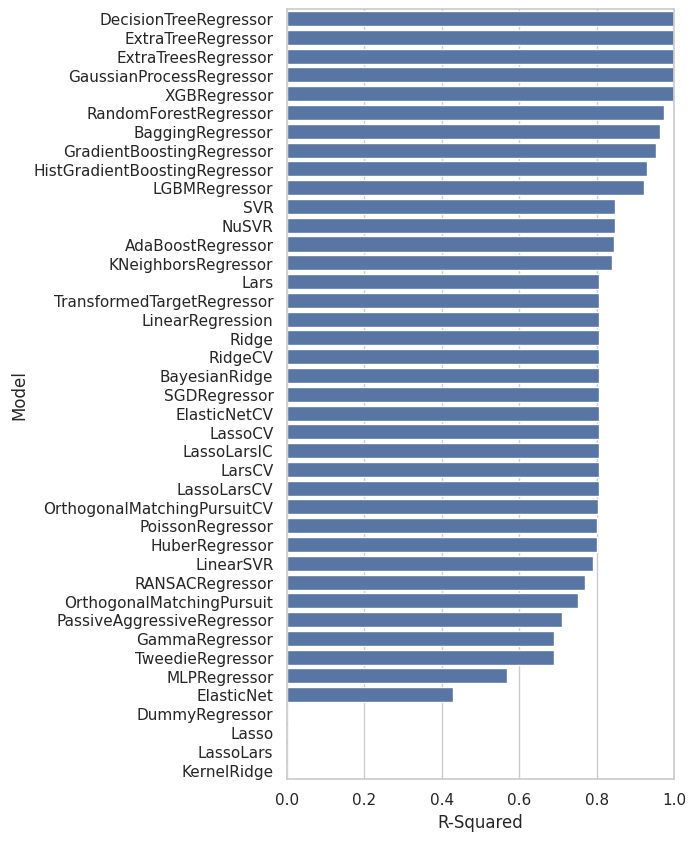

In [16]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

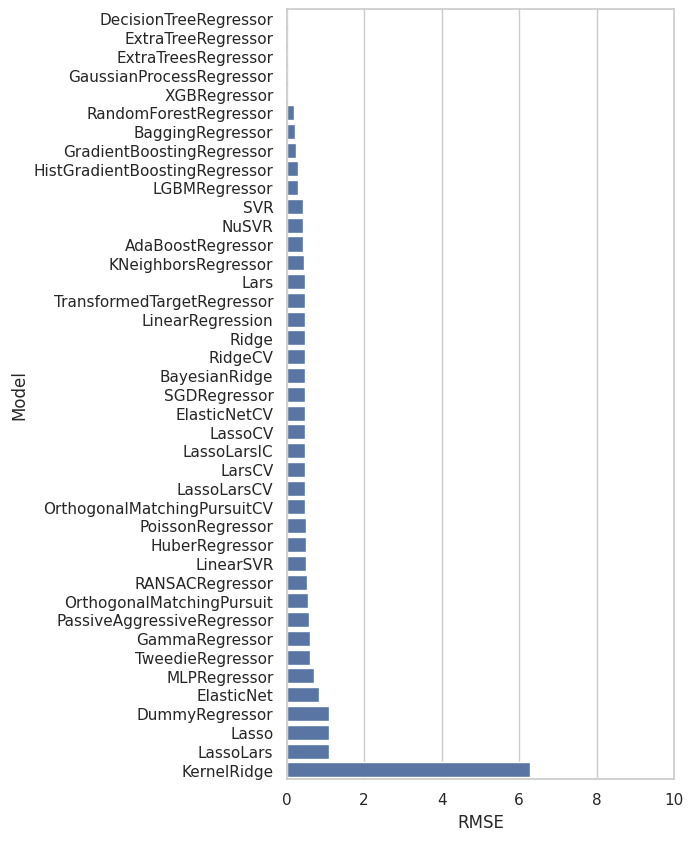

In [17]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

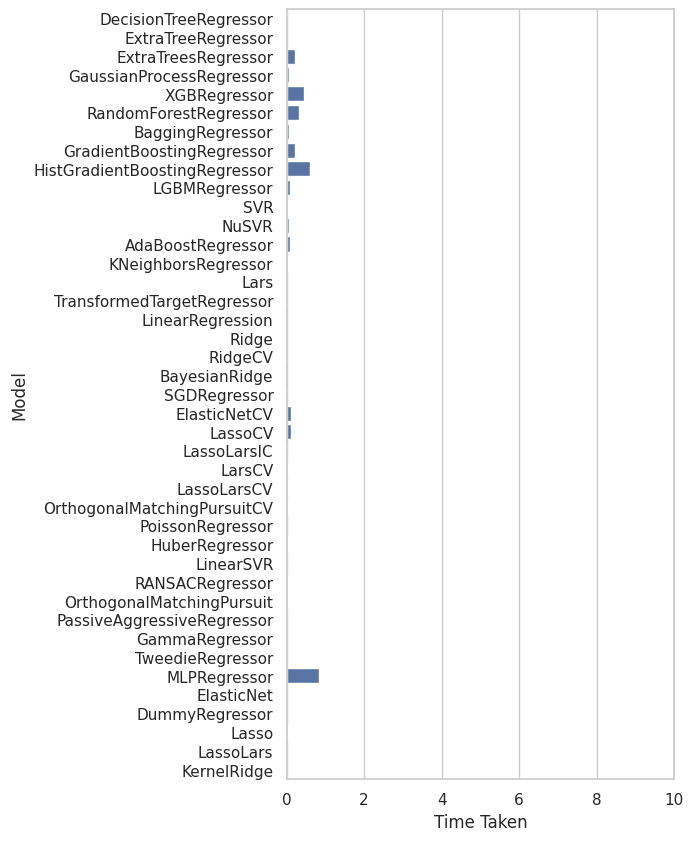

In [18]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))